In [1]:
from data_treat.get_ready_data import get_data, get_data_for_analiz
import pandas as pd
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer
from data_treat.util_class import ThreeQRule


In [2]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order","fraud"]

In [3]:
data = get_data_for_analiz()


In [4]:
#data = get_data()

Общее описание данных

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


При мошенничестве

In [7]:
data[data["fraud"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Не при мошенничестве

In [8]:
data[data["fraud"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,912597.0,22.832976,52.828655,0.004874,3.828942,9.673847,24.158057,8777.136420
distance_from_last_transaction,912597.0,4.301391,22.472359,0.000118,0.293859,0.985074,3.268578,11851.104565
ratio_to_median_purchase_price,912597.0,1.423642,1.946152,0.004399,0.449768,0.913950,1.788918,267.802942
repeat_retailer,912597.0,0.881672,0.322997,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,912597.0,0.359402,0.479825,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,912597.0,0.109944,0.312821,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,912597.0,0.622225,0.484831,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,912597.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
Normilized_data = pd.DataFrame(CustomNormalizer.normalize(data),columns=COLUMNS)

Убираем данные за пределами 3-х стандартных отклонений

In [14]:
q3_data = ThreeQRule(Normilized_data).get_data()

In [9]:
q3_data = ThreeQRule(data).get_data()

In [1]:
Normilized_data.head()

NameError: name 'Normilized_data' is not defined

In [11]:
Normilized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,174806.0,0.004192,0.009852,0.0,0.000387,0.001104,0.003534,1.0
distance_from_last_transaction,174806.0,0.003935,0.017020,0.0,0.000143,0.000492,0.001764,1.0
ratio_to_median_purchase_price,174806.0,0.013884,0.017831,0.0,0.002548,0.007482,0.019594,1.0
repeat_retailer,174806.0,0.881383,0.323338,0.0,1.000000,1.000000,1.000000,1.0
used_chip,174806.0,0.308216,0.461758,0.0,0.000000,0.000000,1.000000,1.0
used_pin_number,174806.0,0.057916,0.233585,0.0,0.000000,0.000000,0.000000,1.0
online_order,174806.0,0.784327,0.411290,0.0,1.000000,1.000000,1.000000,1.0
fraud,174806.0,0.500000,0.500001,0.0,0.000000,0.500000,1.000000,1.0


<AxesSubplot:>

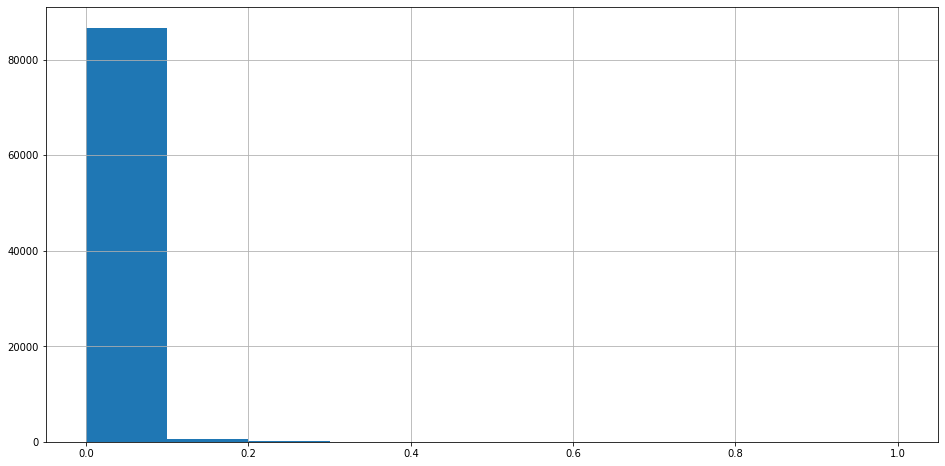

In [12]:
Normilized_data[Normilized_data["fraud"] == 1]["distance_from_last_transaction"].hist(figsize=(16, 8))

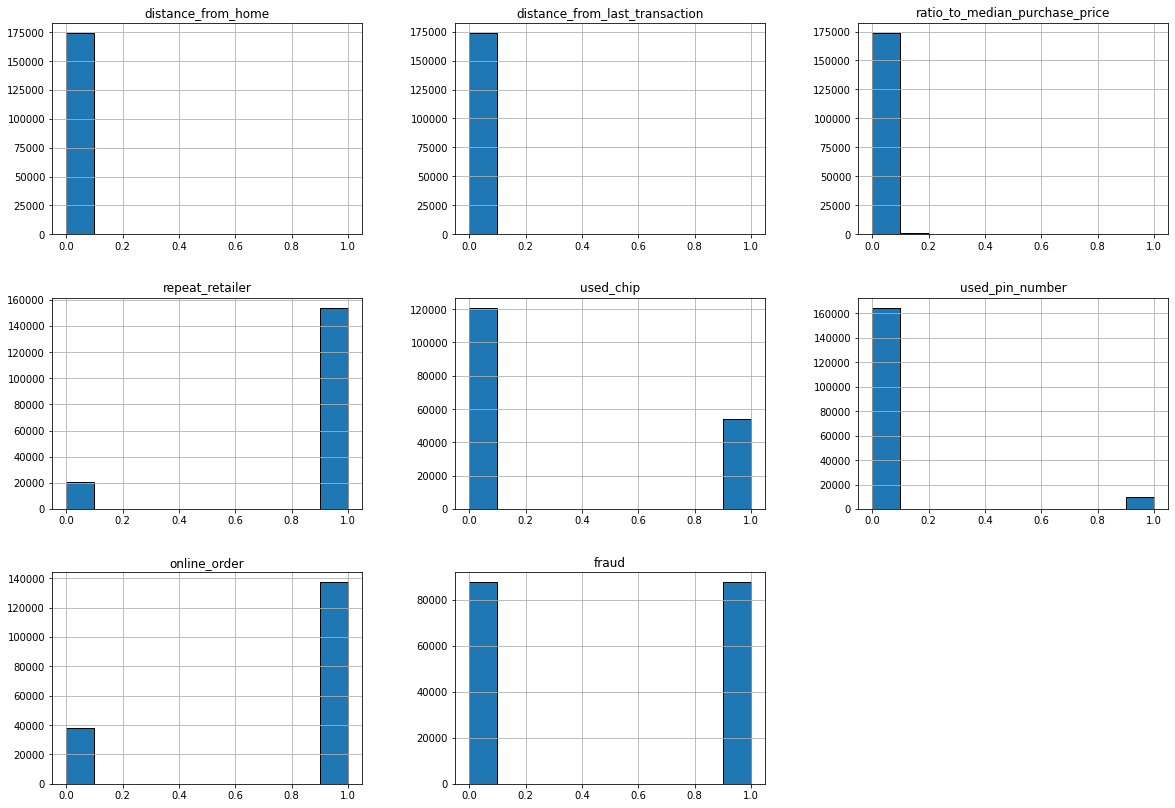

In [13]:
Normilized_data.hist(figsize=(20,14), edgecolor="black")
plt.show()

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

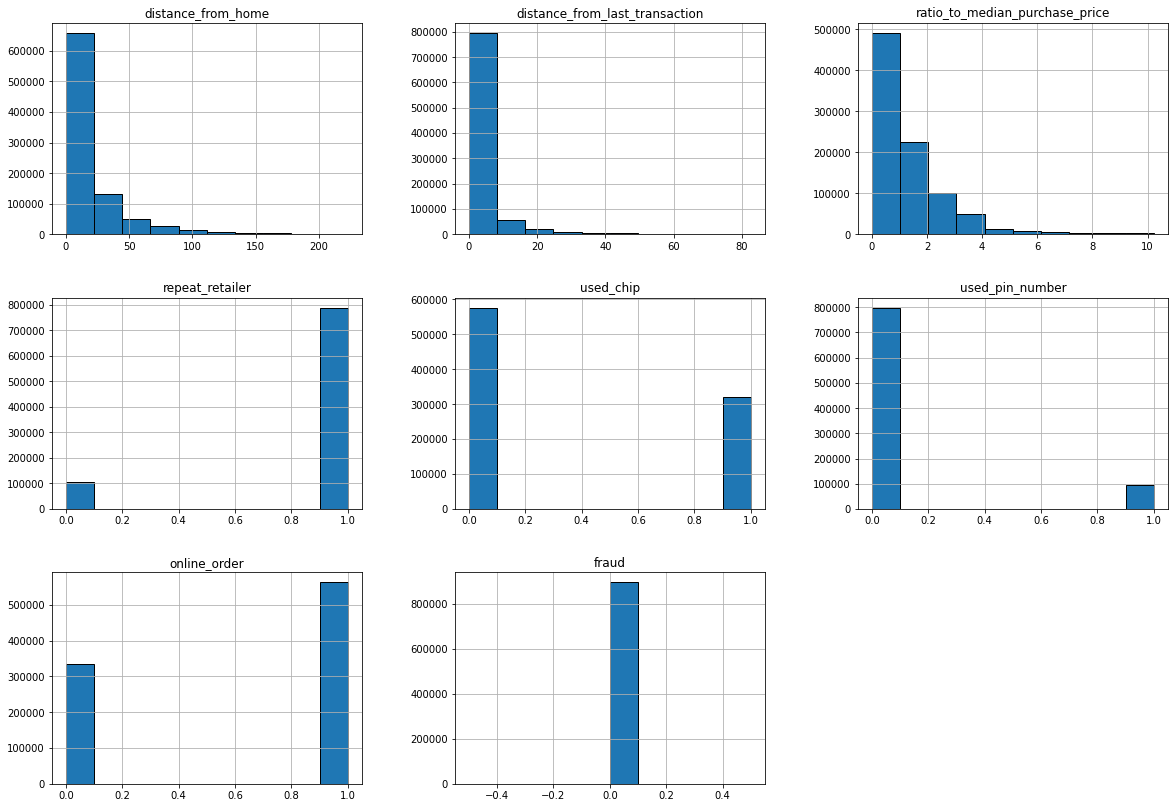

In [18]:
q3_data.hist(figsize=(20,14), edgecolor="black")

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

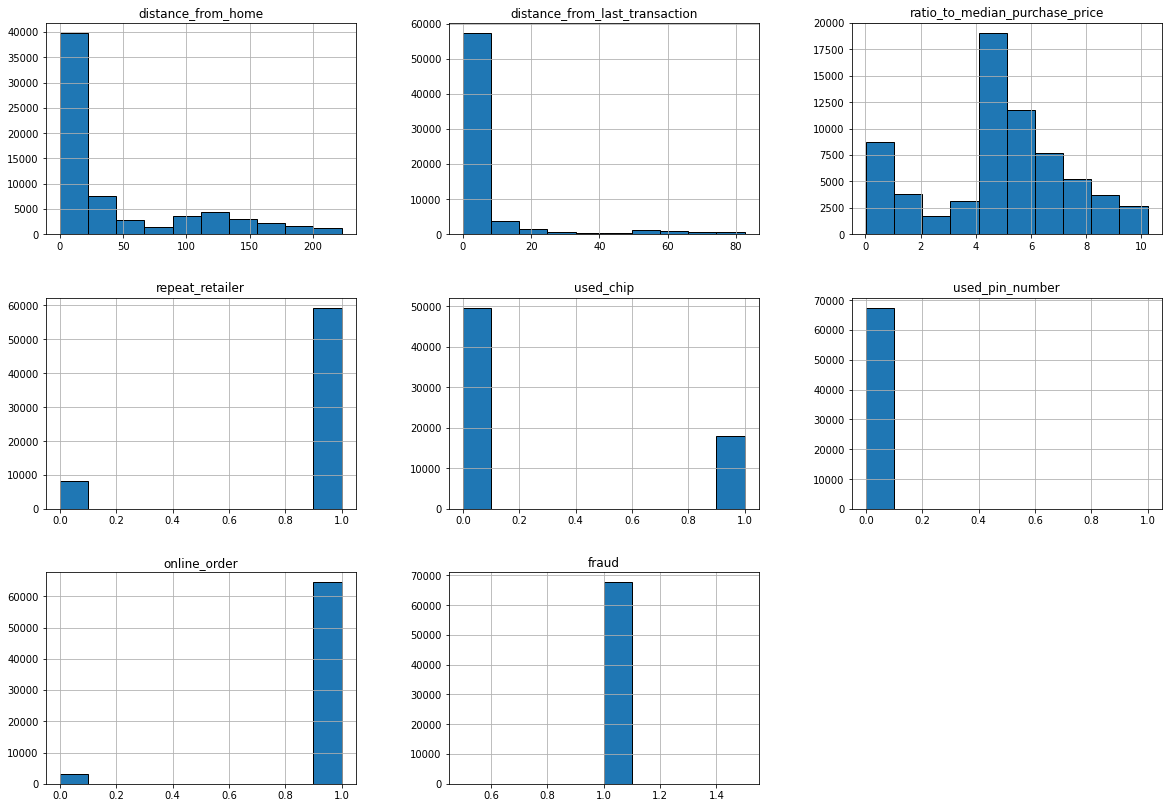

In [10]:
q3_data[q3_data["fraud"] == 1].hist(figsize=(20,14), edgecolor="black")

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

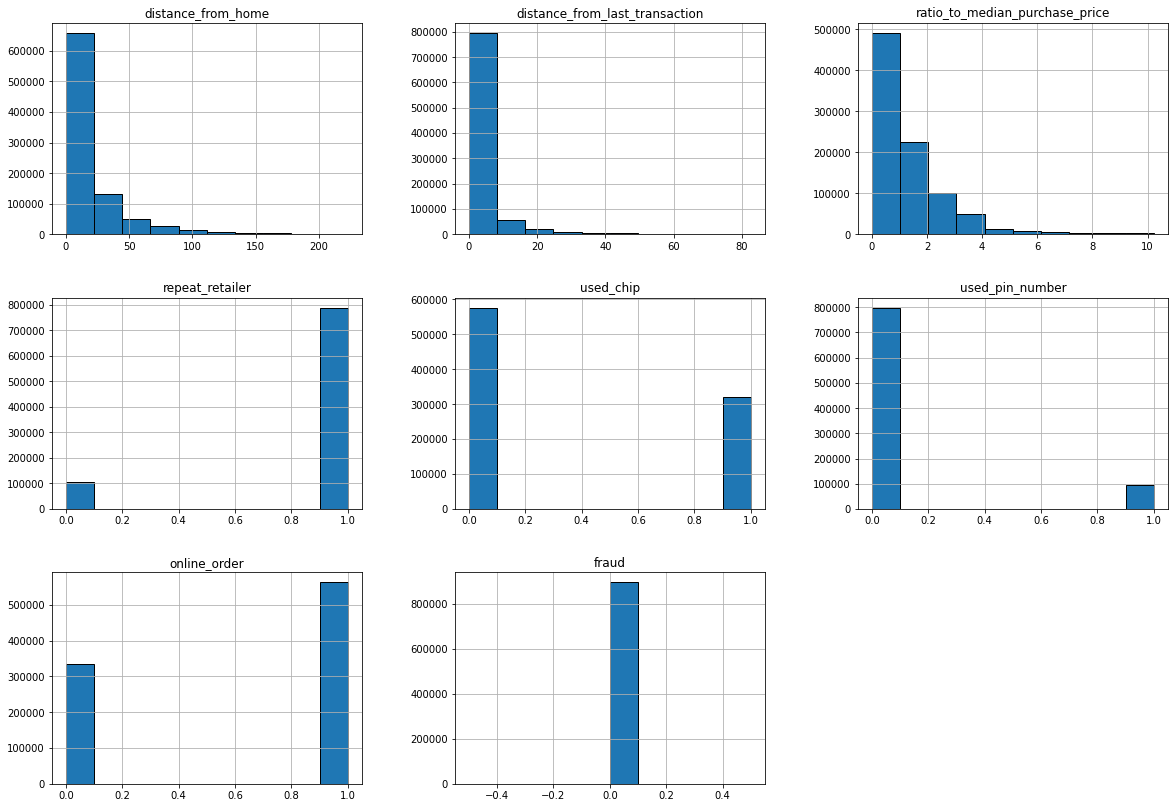

In [11]:
q3_data[q3_data["fraud"] == 0].hist(figsize=(20,14), edgecolor="black")